# 5.1.5 Problemas de regresión

**Estados de la naturaleza y acciones:** $\;$ reales, $\,\mathcal{H}=\mathcal{A}=\mathcal{Y}=\mathbb{R}$

**Pérdidas L2 ($\ell_2$, cuadrática o error cuadrático), L1 ($\ell_1$) y Huber:** $\;$ Huber combina L1 y L2 de acuerdo con un parámetro $\,\delta\geq 0$
$$\begin{align*}
\ell_2(h,a)=(h-a)^2%
&&&& \ell_1(h,a)=\lvert{h-a}\rvert%
&&&& \ell_{\delta}(h,a)=\begin{cases}
\frac{(h-a)^2}{2} & \text{si $\lvert{h-a}\rvert\leq\delta$}\\[3mm]%
\delta\lvert{h-a}\rvert-\frac{\delta^2}{2} & \text{si $\lvert{h-a}\rvert>\delta$}%
\end{cases}%
\end{align*}$$

**Comparación gráfica:** $\;$ L2, L1 y Huber en función de la desviación de la verdad, $\,h-a$

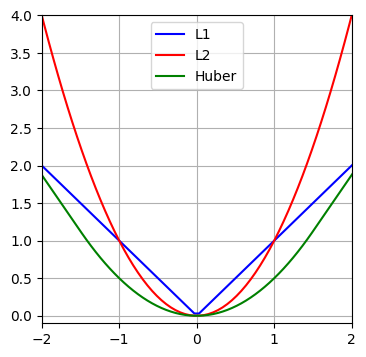

In [2]:
import numpy as np; import matplotlib.pyplot as plt 
e = np.linspace(-3.0, 3.0, 100) # e = h - a (error)
L1 = abs(e); L2 = np.square(e); delta = 1.5; i = abs(e) <= delta
Huber = (abs(e)<=delta) * 0.5*L2 + (abs(e)>delta) * delta*(L1-delta/2);
plt.figure(figsize=(4, 4)); plt.xlim((-2, 2)); plt.ylim((-0.1, 4)); plt.grid(); 
plt.plot(e, L1, 'b'); plt.plot(e, L2, 'r'); plt.plot(e, Huber, 'g'); plt.legend(['L1', 'L2', 'Huber']);

**Observaciones que se derivan de la comparación gráfica:**
* L1 penaliza **linealmente** las desviaciones de la verdad
* L2 penaliza **cuadráticamente** las desviaciones de la verdad, por lo que es **más sensible a outliers** que L1
* Huber representa un compromiso entre L1 y L2

**Pérdida L2 esperada a posteriori:**
$$R(a\mid\boldsymbol{x})%
=\mathbb{E}[(h-a)^2\mid\boldsymbol{x}]%
=\mathbb{E}[h^2\mid\boldsymbol{x}]-2a\mathbb{E}[h\mid\boldsymbol{x}]+a^2$$

**Regresor de Bayes L2 o minimum mean squared error (MMSE):** $\;$ **media a posteriori** 
$$\frac{\partial}{\partial a}R(a\mid\boldsymbol{x})%
=-2\mathbb{E}[h\mid\boldsymbol{x}]+2a=0%
\quad\Rightarrow\quad%
\pi(\boldsymbol{x})=\mathbb{E}[h\mid\boldsymbol{x}]=\int h \,p(h\mid\boldsymbol{x})\,dh$$

**Pérdida L1 esperada a posteriori:**
$$R(a\mid\boldsymbol{x})%
=\mathbb{E}[\lvert{h-a}\rvert\mid\boldsymbol{x}]%
=\int\lvert{h-a}\rvert\,p(h\mid\boldsymbol{x})\,dh%
=\int_{\infty}^a(a-h)\,p(h\mid\boldsymbol{x})\,dh%
+\int_a^{\infty}(h-a)\,p(h\mid\boldsymbol{x})\,dh$$

**Regresor de Bayes L1:** $\;$ **mediana a posteriori**
$$a:\;P(h<a\mid\boldsymbol{x})=P(h\geq a\mid\boldsymbol{x})=0.5$$

**Pérdidas para $\mathbb{R}^D$:** $\;$ las pérdidas usuales para $\mathbb{R}$ pueden extenderse fácilmente a $\mathbb{R}^D$ y usarse para calcular los parámetros óptimos que debe devolver un estimador, la acción óptima que debe realizar un robot, etc.